In [1]:
import pandas as pd
import numpy as np
import random
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pickle
%matplotlib inline

In [2]:
def Metric_Comp(predict, true):
    error = predict - true
    error = np.absolute(error)
    error = error/true
    error = np.mean(error)
    return 1 - error

In [3]:
def train_predict(model, X, Y, X_vali):
    model_fitted = model.fit(X,Y)
    Y_vali = model_fitted.predict(X_vali)
    return model_fitted, Y_vali

In [4]:
def test_predict(model, X_test):
    Y_test = model.predict(X_test)
    return Y_test

## Reading files from folder

In [116]:
training_data = pd.read_csv('..\\..\\intermediate_files\\training_data.csv')

In [117]:
test_data = pd.read_csv('..\\..\\intermediate_files\\validation_data.csv')

In [118]:
training_data.shape

(831, 47)

In [119]:
x_trained_columns = list(training_data.columns[2:])
y_trained_columns = 'close'

In [36]:
?train_predict

In [9]:
model_log = LinearRegression()
model_log, test_pred = train_predict(model_log, training_data[x_trained_columns].values, np.log(training_data[y_trained_columns].values), test_data[x_trained_columns].values)

In [10]:
test_pred

array([  8.00798367,   8.6860701 ,   8.91546559,   8.61431065,
         8.68678001,   8.7944917 ,   8.08321027,   7.8865057 ,
         8.17783033,   8.80756886,  10.07984118,   6.6987612 ,
         6.50749645,   9.05371514,   8.21367963,   8.2646812 ,
         9.42240771,   9.8257591 ,   8.77691195,   6.59924126,
         6.30014208,   7.90710232,   7.03494274,   6.41894462,
         6.33704457,   8.40292258,   8.87450662,   8.7558943 ,
         8.81850439,   9.14246033,   6.29414218,   9.44987722,
         7.83750616,   8.88797491,   9.41278167,   9.14099602,
         9.6019632 ,   9.20900945,   6.50278802,   9.25001943,
         6.17929444,   8.7288445 ,   8.41725042,   6.3328403 ,
         6.29278341,   6.26497994,   8.75243485,   8.62680899,
         6.74096484,   9.61585652,   6.20952445,   8.75225951,
         8.03040829,   7.16016163,   7.74801388,   9.61072534,
         8.84166873,   6.66424747,   8.2992487 ,   6.74440719,
         8.91903585,   7.08699598,   8.21733025,   6.08

In [11]:
test_data['close_pred'] = np.exp(test_pred)

In [12]:
y_pred = test_predict(model_log, training_data[x_trained_columns].values)
   

In [13]:
Metric_Comp(np.exp(y_pred), training_data['close'].values)

0.91325870485189409

In [14]:
Metric_Comp(np.exp(test_pred), test_data['close'].values)

0.8941203715937045

In [17]:
np.exp(test_pred)

array([  6613.11477374,   6698.92791605,   7465.37247218,   6331.99581622,
         6412.71664828,   6849.43929857,   6859.13188246,   6688.21465107,
         6980.12228084,   7580.10505252,   6734.1973279 ,   6800.86198086,
         8236.52119703,   7157.45497819,   7212.13254605,   7163.92533827,
         7242.8591166 ,   6914.89837206,   6758.24298861,   6461.19527855,
         6631.83827491,   7229.76028124,   6903.133006  ,   7822.99404192,
         7143.09856083,   7671.84573147,   7594.67699933,   8017.08263077,
         7990.39064815,   7844.74431849,   7496.8808106 ,   7163.99481264,
         8298.16128752,   7570.39197223,   9067.9791172 ,   8404.66244842,
         7497.59699569,   8338.78836915,   8117.66035895,   8263.57525015,
         9365.03960814,   8151.13574117,   7360.07581988,   6703.93825059,
         6999.84450712,   8260.08734884,   7201.26153744,   8067.64129854,
         9347.0997756 ,  10335.54270647])

In [16]:
np.exp(np.log(test_data['close'].values))

array([ 6274.58,  6285.99,  6290.93,  6596.54,  6596.11,  6544.43,
        6476.71,  6465.41,  6489.19,  6482.35,  6487.16,  6475.74,
        6495.84,  6476.29,  6474.75,  6480.38,  6486.39,  6332.63,
        6334.27,  6317.61,  6377.78,  6388.44,  6361.26,  6376.13,
        6419.66,  6461.01,  6530.14,  6453.72,  6385.62,  6409.22,
        6411.27,  6371.27,  6359.49,  5738.35,  5648.03,  5575.55,
        5554.33,  5623.54,  4871.49,  4451.87,  4602.17,  4365.94,
        4347.11,  3880.76,  4009.97,  3779.13,  3820.72,  4257.42,
        4278.85,  4017.27])

In [123]:
#inter
#test_data.head()

### taking log of some values

In [120]:
min_max = dict()
for col in x_trained_columns:
    min_max[col] = [training_data[col].min(), training_data[col].max()]

In [121]:
'''log of variables with greater values'''
log_col = []
for key in min_max.keys():
    if min_max[key][0] > 10000:
        log_col.append(key)


In [122]:
log_col

['blocks_size',
 'difficulty',
 'est_transaction_volume_USD',
 'est_transaction_volume',
 'hash_rate',
 'miners_revenue',
 'n_transactions_excl_chains_longer_than_100',
 'n_transactions_excl_popular',
 'n_transactions',
 'n_unique_addresses',
 'output_volume',
 'total_bitcoins',
 'trade_volume',
 'transaction_fees_USD',
 'mempool_size_mean',
 'mempool_size_stddev',
 'mempool_size_max',
 'utxo_count_mean',
 'utxo_count_min',
 'utxo_count_max']

In [123]:
training_data[log_col] = np.log(training_data[log_col])

In [124]:
test_data[log_col] = np.log(test_data[log_col])

In [125]:
model_log = LinearRegression()
model_log, test_pred = train_predict(model_log, training_data[x_trained_columns].values, np.log(training_data[y_trained_columns].values), test_data[x_trained_columns].values)

In [126]:
y_pred = test_predict(model_log, training_data[x_trained_columns].values)
   

In [127]:
y_pred

array([ 6.13979206,  6.14617809,  6.10286294,  6.12394833,  6.10020516,
        6.11503806,  6.09455096,  6.11412567,  6.10707705,  6.10605815,
        6.13596956,  6.12922315,  6.12953482,  6.11279086,  6.1167363 ,
        6.12396393,  6.11767963,  6.1251591 ,  6.12139393,  6.11726599,
        6.12120285,  6.08836557,  6.09242969,  6.09748497,  6.08551879,
        6.09500531,  6.10333099,  6.11355741,  6.15743693,  6.26272415,
        6.24053879,  6.2808649 ,  6.29516575,  6.29480174,  6.34497889,
        6.35335152,  6.37407405,  6.35625088,  6.35803933,  6.35749975,
        6.3632359 ,  6.39328652,  6.50259071,  6.5615528 ,  6.53718615,
        6.54861825,  6.61337573,  6.62566859,  6.63704992,  6.61116561,
        6.51260822,  6.38108912,  6.48987786,  6.49682546,  6.43979862,
        6.47568774,  6.46669985,  6.51725748,  6.55478344,  6.49233567,
        6.50237767,  6.51674772,  6.49693872,  6.47988834,  6.47916982,
        6.4790529 ,  6.52041323,  6.48833635,  6.49310899,  6.50

In [128]:
training_data['close'].values

array([   461.43,    466.09,    444.69,    455.1 ,    448.32,    451.88,
          444.67,    450.3 ,    446.72,    447.98,    459.6 ,    458.54,
          458.55,    450.89,    454.77,    455.67,    455.67,    457.57,
          454.16,    453.78,    454.62,    438.71,    442.68,    443.19,
          439.32,    444.15,    449.6 ,    453.38,    473.46,    530.04,
          526.23,    531.39,    536.92,    537.97,    569.19,    572.73,
          585.54,    576.6 ,    581.65,    574.63,    577.47,    606.73,
          672.78,    704.38,    685.56,    694.47,    748.91,    756.23,
          763.78,    737.23,    666.65,    596.12,    665.3 ,    665.12,
          629.37,    647.  ,    639.89,    673.34,    703.7 ,    658.66,
          670.63,    677.33,    666.52,    650.96,    649.36,    647.66,
          664.55,    654.47,    658.08,    663.26,    660.77,    679.46,
          672.86,    665.01,    655.56,    661.28,    651.78,    654.35,
          655.03,    655.05,    624.68,    606.27, 

In [129]:
Metric_Comp(np.exp(y_pred), training_data['close'].values)

0.99040529886171746

### Permutation Importance

In [86]:
?Metric_Comp
x_trained_columns = list(training_data.columns[2:])
x_trained_columns.remove('news_stories_total')

In [40]:
x_trained_columns

['avg_block_size',
 'blocks_size',
 'cost_per_transaction_percent',
 'cost_per_transaction',
 'difficulty',
 'est_transaction_volume_USD',
 'est_transaction_volume',
 'hash_rate',
 'median_confirmation_time',
 'miners_revenue',
 'n_transactions_excl_chains_longer_than_100',
 'n_transactions_excl_popular',
 'n_transactions_per_block',
 'n_transactions',
 'n_unique_addresses',
 'output_volume',
 'total_bitcoins',
 'trade_volume',
 'transaction_fees_USD',
 'transaction_fees',
 'mempool_count_mean',
 'mempool_count_stddev',
 'mempool_count_min',
 'mempool_count_max',
 'mempool_growth_mean',
 'mempool_growth_stddev',
 'mempool_growth_min',
 'mempool_growth_max',
 'mempool_size_mean',
 'mempool_size_stddev',
 'mempool_size_min',
 'mempool_size_max',
 'wallets_created',
 'transactions_per_sec_mean',
 'transactions_per_sec_stddev',
 'transactions_per_sec_min',
 'transactions_per_sec_max',
 'utxo_count_mean',
 'utxo_count_stddev',
 'utxo_count_min',
 'utxo_count_max',
 'news_stories_total',
 'n

In [130]:
start = datetime.now()
model_log = LinearRegression()
model_log, test_pred = train_predict(model_log, training_data[x_trained_columns].values, np.log(training_data[y_trained_columns].values), test_data[x_trained_columns].values)
perm = PermutationImportance(model_log, random_state=1, scoring='neg_mean_absolute_error').fit(training_data[x_trained_columns].values, np.log(training_data[y_trained_columns].values))
eli5.show_weights(perm, feature_names = training_data[x_trained_columns].columns.tolist())
end = datetime.now()

In [131]:
y_pred = test_predict(model_log, training_data[x_trained_columns].values)
Metric_Comp(np.exp(y_pred), training_data['close'].values)

0.99040529886171746

In [132]:
coef_ = pd.DataFrame(x_trained_columns, columns = ['colum'])
coef_['coeff'] = model_log.coef_

In [133]:
coef_['feature_import'] = perm.feature_importances_

In [134]:
coef_.sort_values(['feature_import'],ascending=False)

,colum,coeff,feature_import
41,news_stories_total,-9.341641e-03,5.365838e+00
43,news_stories_negative,9.339008e-03,2.576999e+00
42,news_stories_positive,9.339139e-03,2.222403e+00
5,est_transaction_volume_USD,1.004160e+00,1.095023e+00
44,news_stories_neutral,9.364059e-03,6.599905e-01
6,est_transaction_volume,-9.976226e-01,5.451573e-01
37,utxo_count_mean,-2.044641e+00,3.140296e-01
40,utxo_count_max,1.280793e+00,1.970590e-01
39,utxo_count_min,7.729856e-01,1.158739e-01
7,hash_rate,2.738897e-02,3.233360e-02


In [29]:
#coef_.to_csv('..\\..\\intermediate_files\\feature_importance_PI.csv', index=None)

### Subsetting using feature importance data

In [140]:
x_trained_columns = coef_[coef_['feature_import'] > 0.01]['colum'].values.tolist()

In [31]:
#x_trained_columns.remove('news_stories_total')

In [141]:
model_log = LinearRegression()
#x_trained_columns = list(training_data.columns)
#x_trained_columns.remove('close')
#x_trained_columns.remove('date')
#x_trained_columns.remove('close_lag_1')
#model_log = RandomForestRegressor(n_estimators=500, max_depth=5)
from sklearn.linear_model import Ridge
#model_log = Ridge()
model_log, test_pred = train_predict(model_log, training_data[x_trained_columns].values, np.log(training_data[y_trained_columns].values), test_data[x_trained_columns].values)

In [142]:
y_pred = test_predict(model_log, training_data[x_trained_columns].values)

In [143]:
Metric_Comp(np.exp(y_pred), training_data['close'].values)

0.99029440499969257

In [144]:
Metric_Comp(np.exp(test_pred), test_data['close'].values)

0.99061162785024659

In [145]:
actual_test = pd.read_csv('..\\..\\Bitcoin_Data2\\test_timeseries2.csv')
actual_test[log_col] = np.log(actual_test[log_col])
actual_pred = test_predict(model_log, actual_test[x_trained_columns].values)

In [146]:
Metric_Comp(np.exp(actual_pred), inter['close'].values)

0.98491051570148624

In [176]:
rf_imp = pd.DataFrame(x_trained_columns, columns = ['colum'])
rf_imp['feature_import'] = model_log.feature_importances_

In [178]:
rf_imp.sort_values(['feature_import'],ascending=False)

,colum,feature_import
3,cost_per_transaction,6.074992e-01
9,miners_revenue,2.417492e-01
1,blocks_size,6.067775e-02
16,total_bitcoins,5.750323e-02
39,utxo_count_min,8.608060e-03
37,utxo_count_mean,8.129878e-03
40,utxo_count_max,6.844202e-03
18,transaction_fees_USD,4.524100e-03
32,wallets_created,2.421789e-03
4,difficulty,1.524751e-03


In [179]:
coef_

,colum,coeff,feature_import
0,avg_block_size,1.722257e-02,0.000623
1,blocks_size,-4.901031e-02,0.011588
2,cost_per_transaction_percent,3.165935e-03,0.000407
3,cost_per_transaction,-5.273208e-05,0.000416
4,difficulty,-2.788377e-04,0.000007
5,est_transaction_volume_USD,1.010708e+00,1.077246
6,est_transaction_volume,-1.005376e+00,0.549056
7,hash_rate,1.778770e-02,0.018465
8,median_confirmation_time,2.214686e-04,0.000054
9,miners_revenue,-9.847899e-03,0.007094


### testing the variables

In [72]:
inter = pd.read_csv('..\\..\\submission\\Next_day_open.csv')

In [ ]:
test_data[['date','close']].to_csv('..\\..\\submission\\5th_submission.csv', index=None)

In [60]:
test_predict

<function __main__.test_predict>

In [85]:
Metric_Comp(np.exp(test_pred), inter['close'].values)

0.97847861059628405

In [39]:
Metric_Comp(np.exp(test_pred), test_data['close'].values)

0.99034859375440831

### Lets look at some plots

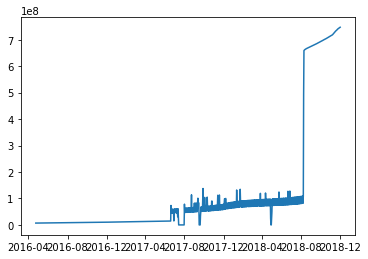

In [180]:
plt.plot(pd.to_datetime(training_data['date']),training_data['wallets_created'])

In [34]:
x_trained_columns

['avg_block_size',
 'blocks_size',
 'cost_per_transaction_percent',
 'cost_per_transaction',
 'difficulty',
 'est_transaction_volume_USD',
 'est_transaction_volume',
 'hash_rate',
 'median_confirmation_time',
 'miners_revenue',
 'n_transactions_excl_chains_longer_than_100',
 'n_transactions_excl_popular',
 'n_transactions_per_block',
 'n_transactions',
 'n_unique_addresses',
 'output_volume',
 'total_bitcoins',
 'trade_volume',
 'transaction_fees_USD',
 'transaction_fees',
 'mempool_count_mean',
 'mempool_count_stddev',
 'mempool_count_min',
 'mempool_count_max',
 'mempool_growth_mean',
 'mempool_growth_stddev',
 'mempool_growth_min',
 'mempool_growth_max',
 'mempool_size_mean',
 'mempool_size_stddev',
 'mempool_size_min',
 'mempool_size_max',
 'wallets_created',
 'transactions_per_sec_mean',
 'transactions_per_sec_stddev',
 'transactions_per_sec_min',
 'transactions_per_sec_max',
 'utxo_count_mean',
 'utxo_count_stddev',
 'utxo_count_min',
 'utxo_count_max',
 'news_stories_total',
 'n

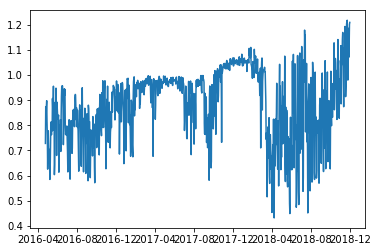

In [37]:
plt.plot(pd.to_datetime(training_data['date']),training_data['avg_block_size'])

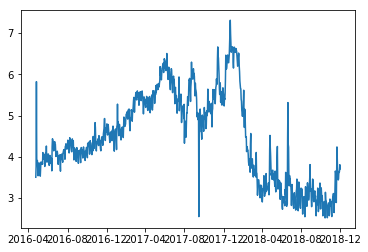

In [48]:
plt.plot(pd.to_datetime(training_data['date']),np.log(training_data['transaction_fees']))

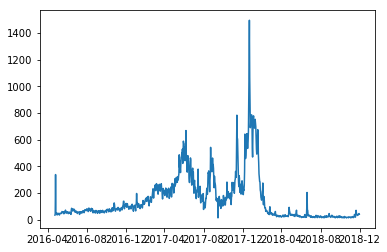

In [49]:
plt.plot(pd.to_datetime(training_data['date']),training_data['transaction_fees'])